In [16]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

### Loading Iris Dataset 

In [17]:
iris = datasets.load_iris()
train = iris.data
target = iris.target
target_names = iris.target_names
print 'the shape of train is %d rows and %d columns' %train.shape
print 'the shape of target is %d rows' %target.shape

the shape of train is 150 rows and 4 columns
the shape of target is 150 rows


### PCA model fitting 

In [27]:
pca_model = PCA(svd_solver = 'full')
pca_model.fit(train)
print 'The shape of the principal components is %d, %d'%pca_model.components_.shape
# let's transform the train dataset i.e projection of train into principal components
train_PCAised = pca_model.transform(train)

The shape of the principal components is 4, 4


### SCREE plot
Scree plot let's us identify how many principal components to choose from. We make a plot between no of components and their explained varaince. It generally is sloping downwards, we choose a threshold at which it's not really explaining variance much. Looking at the figure below, we can see that probably it's a good idea to just select two compenents.

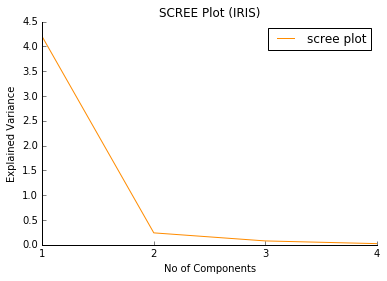

In [37]:
fig, ax = plt.subplots()
ax.plot(range(1, pca_model.components_.shape[0]+1), pca_model.explained_variance_, 
        color = 'darkorange', label = 'scree plot')
ax.xaxis.set_ticks(range(1, pca_model.components_.shape[0]+1))
ax.set_xlabel('No of Components')
ax.set_ylabel('Explained Variance')
ax.set_title('SCREE Plot (IRIS)')
# making plot pretty
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.legend(loc='best', shadow=False)

### Plot of iris data onto PCA components 

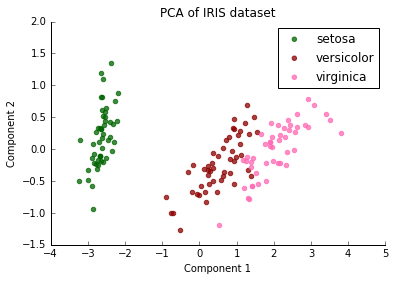

In [49]:
colors = ['darkgreen', 'darkred', 'hotpink']
color_and_misc = zip(colors, [0,1,2], target_names)
fig, ax = plt.subplots()
for c , i , name in color_and_misc:
    ax.scatter(train_PCAised[target == i,0], train_PCAised[target == i,1], 
               color = c , label = name, alpha = 0.75 )
ax.legend(loc='best', shadow = False, scatterpoints = 1)
simpleaxis(ax)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('PCA of IRIS dataset')

### Plotting original iris dataset 

The shape of axes is 2 


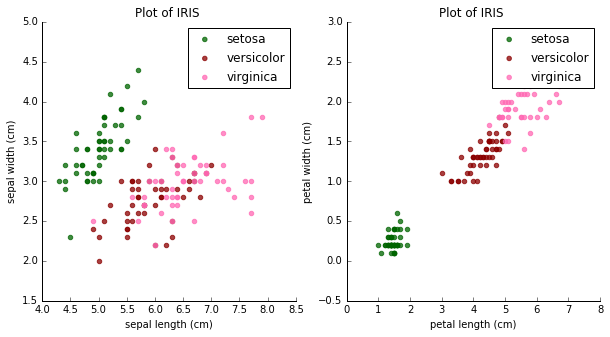

In [60]:
fig, ax_array  = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((10,5))
print 'The shape of axes is %r '%ax_array.shape
colors = ['darkgreen', 'darkred', 'hotpink']
color_and_misc = zip(colors, [0,1,2], target_names)
for ax, ids in zip(ax_array, [[0,1], [2,3]]):
    for c , i , name in color_and_misc:
        ax.scatter(train[target == i,ids[0]], train[target == i,ids[1]], 
                   color = c , label = name, alpha = 0.75 )
    ax.legend(loc='best', shadow = False, scatterpoints = 1)
    simpleaxis(ax)
    ax.set_xlabel(iris.feature_names[ids[0]])
    ax.set_ylabel(iris.feature_names[ids[1]])
    ax.set_title('Plot of IRIS ')

#### As we can see in the plots above, the implicit dimension between sepal length and width appears to be two while implicit dimension between petal length and width is one. 
Implicit dimension for sepal is two because data points are spread along two diagonal but perpendicular lines, while for petal length and width, they appear to be along one straight diagonal line, which is petal_length = petal_width. So we can conclude that we have that diagonal line, we don't need these two petal length and width individually. Our Learning algorithms can work on that diagonal line and still give us the same results, but with less complexity 

### Plotting implicit dimensions 

The shape of axes is 2 


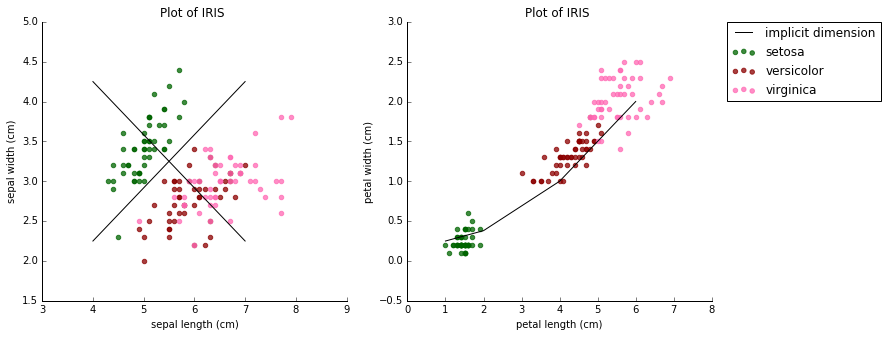

In [80]:
fig, ax_array  = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((12,5))
print 'The shape of axes is %r '%ax_array.shape
colors = ['darkgreen', 'darkred', 'hotpink']
color_and_misc = zip(colors, [0,1,2], target_names)
for ax, ids in zip(ax_array, [[0,1], [2,3]]):
    for c , i , name in color_and_misc:
        ax.scatter(train[target == i,ids[0]], train[target == i,ids[1]], 
                   color = c , label = name, alpha = 0.75 )
    
    simpleaxis(ax)
    ax.set_xlabel(iris.feature_names[ids[0]])
    ax.set_ylabel(iris.feature_names[ids[1]])
    ax.set_title('Plot of IRIS ')
ax_array[1].plot([1,2,4,6], [0.25, 0.38, 1.0, 2], color = 'black', label = 'implicit dimension')
ax_array[0].plot([4.0, 7.0], [2.25, 4.25], color = 'black', label = 'implicit dimension')
ax_array[0].plot([4.0, 7.0], [4.25, 2.25], color = 'black')
ax_array[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)